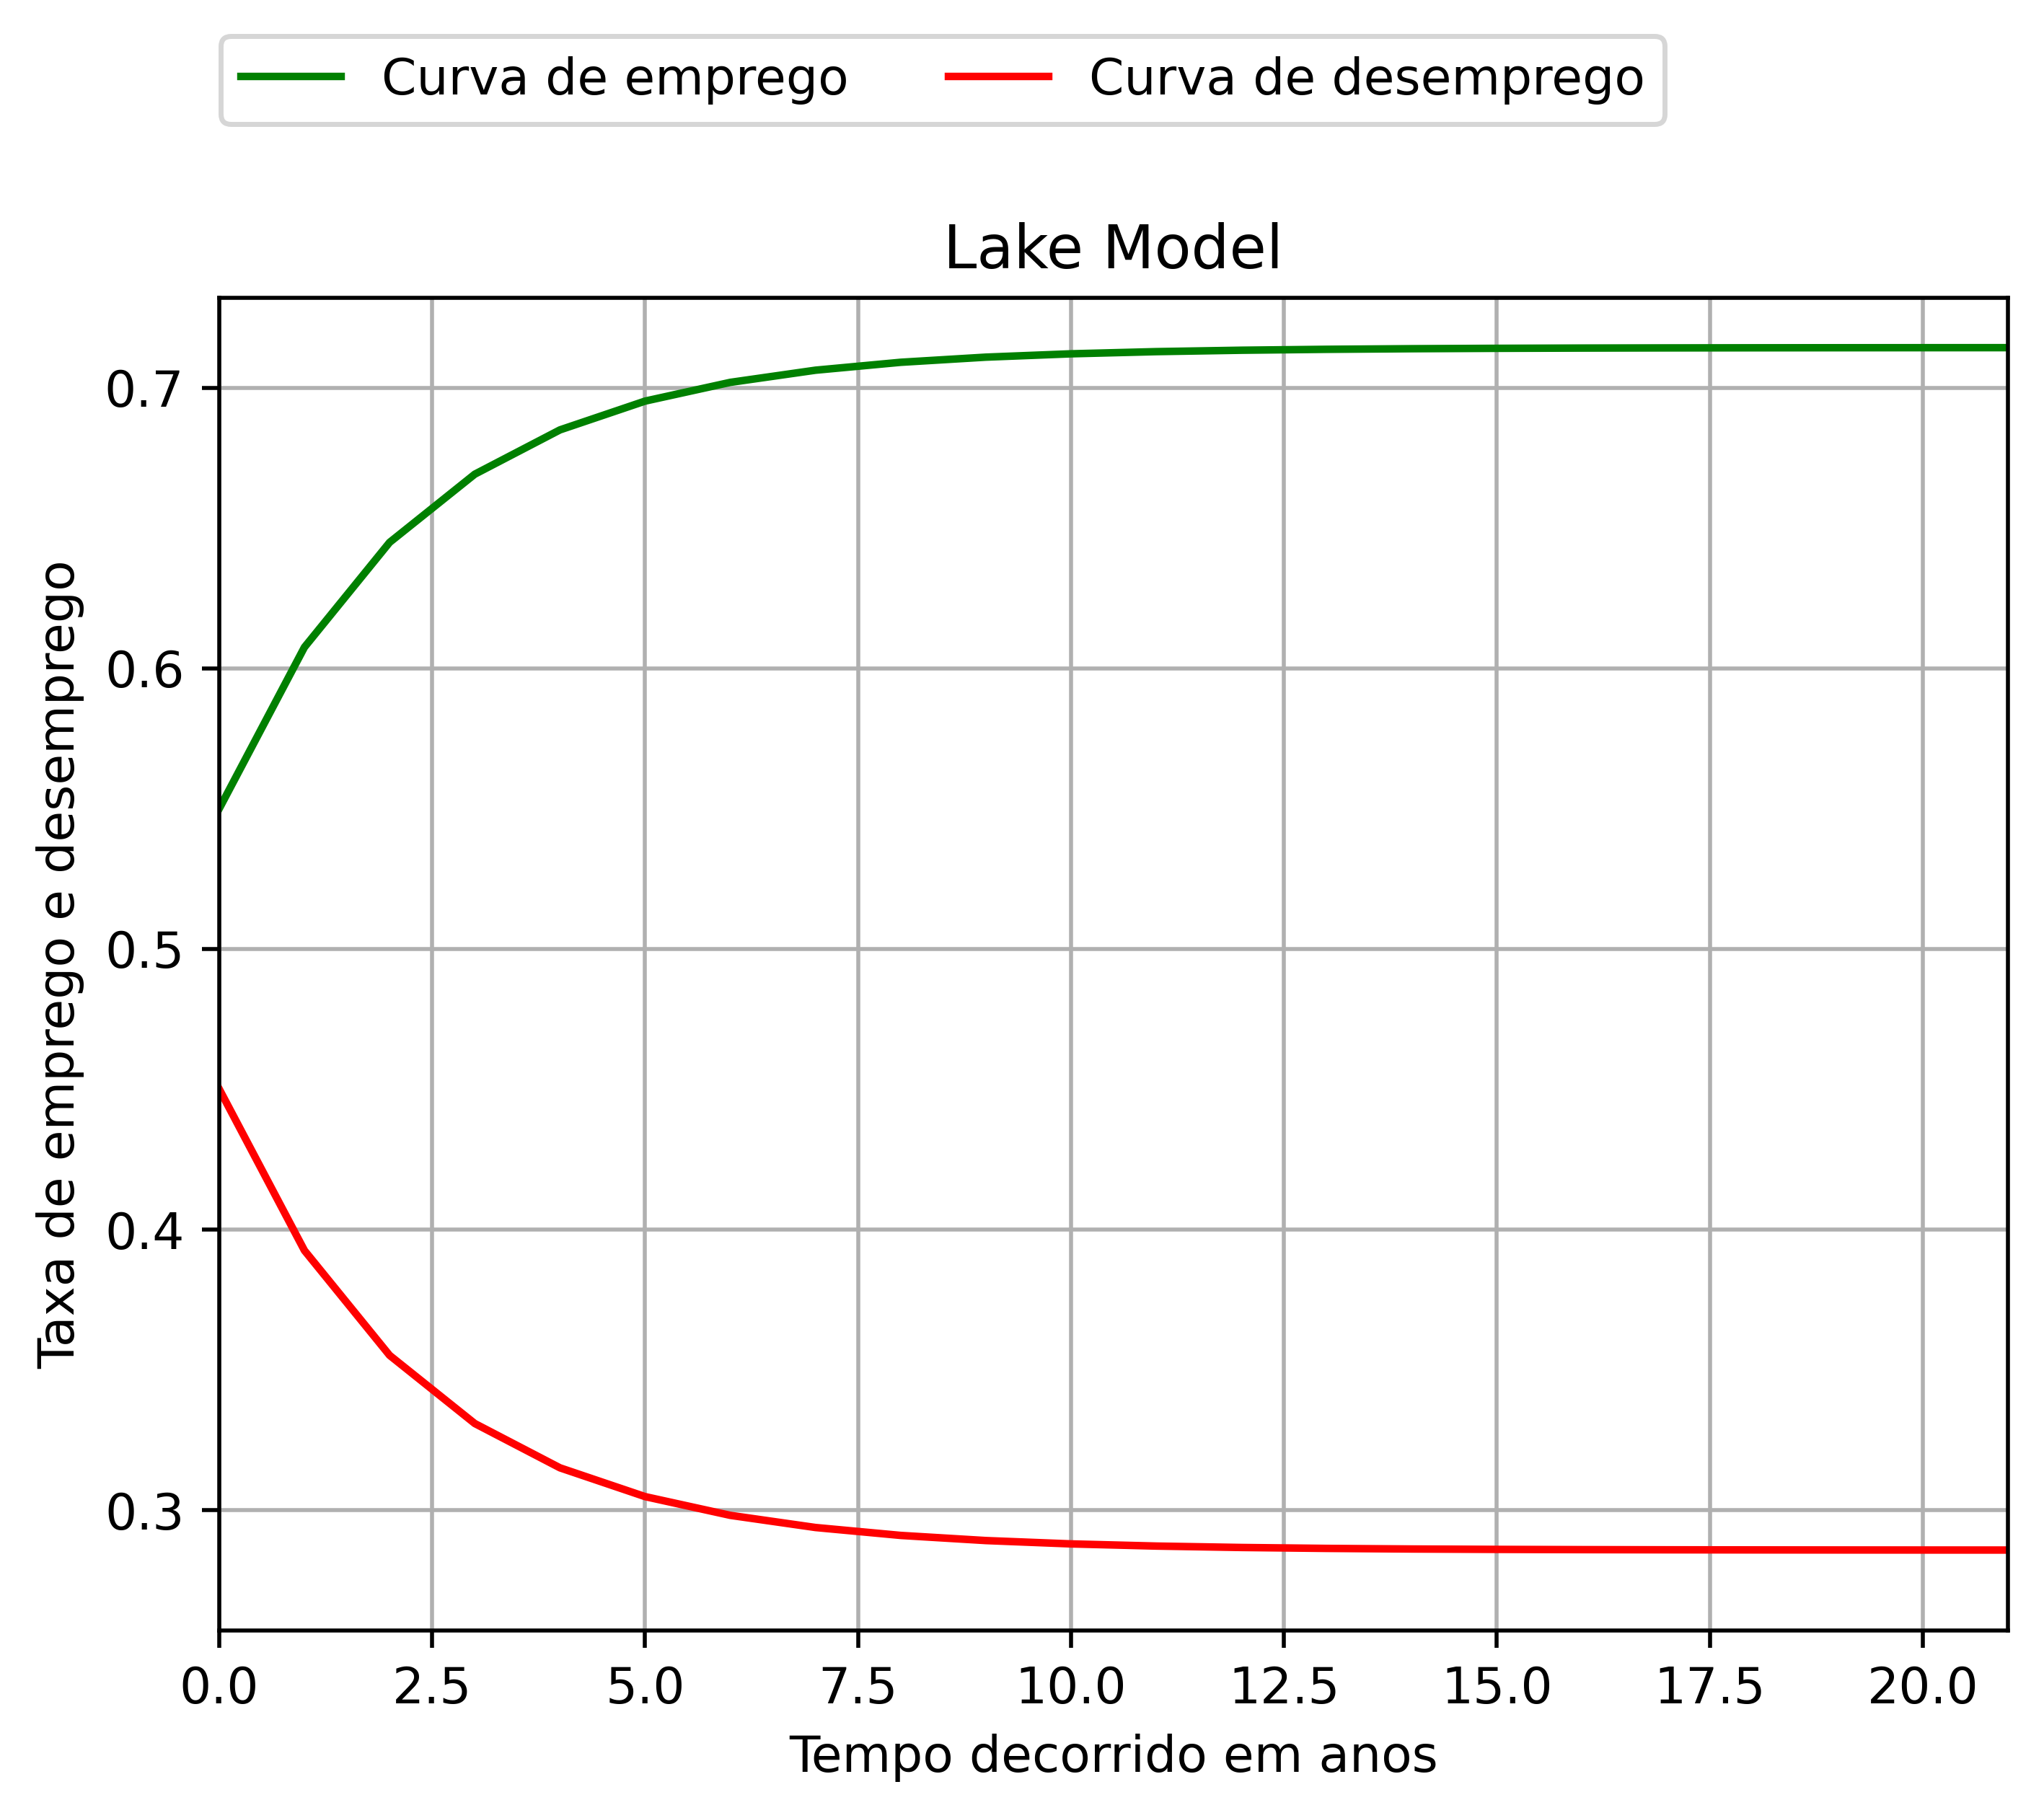

In [1]:
# Calcula o equilíbrio de longo prazo

# Importa o módulo necessário
import matplotlib.pyplot as plt

# Define os parâmetros e as constantes
U_t = 45 # Desemprego
E_t = 55 # Emprego
a = 0.1 # Taxa de demissão (alpha)
l = 0.25 # Taxa de contratação (lambda)

#Calcula a força de trabalho
forca_trabalho = lambda U_t, E_t: U_t + E_t

#Cria as listas de emprego e desemprego
curva_emprego = [E_t / forca_trabalho(U_t, E_t)]
curva_desemprego = [U_t / forca_trabalho(U_t, E_t)]

# Calcula o equilíbrio
def equilibrio(a, l, U_t, E_t):
    global E_novo, U_novo, tempo, demissao, contratacao, lista_tempo
    
    # Cria a demissão e a contratação inicial
    demissao = l * U_t
    contratacao = a * E_t
    
    # Cria um contador de tempo necessário até o equilíbrio
    tempo = 0
    lista_tempo = [tempo]
    
    while abs(contratacao - demissao) > 0.001:
         
        # Calcula o novo emprego e desemprego
        E_novo = (1 - a)* E_t + l * U_t
        U_novo = a * E_t + (1 - l) * U_t
        
        # Cria as curvas de emprego e desemprego
        curva_emprego.append(E_novo / forca_trabalho(U_novo, E_novo))
        curva_desemprego.append(U_novo / forca_trabalho(U_novo, E_novo))
        
        # Atualiza os valores
        demissao = l * U_novo
        contratacao = a * E_novo
        E_t = E_novo
        U_t = U_novo
        
        # Conta quanto tempo demora para o equilíbrio
        tempo = tempo + 1
        lista_tempo.append(tempo)

# Chama a função
equilibrio(a, l, U_t, E_t)

# Plota o gráfico

# Plota as curvas de emprego e desemprego
fig, ax = plt.subplots(dpi = 500) # Nitidez
ax.plot(lista_tempo, curva_emprego, label = "Curva de emprego",
        color = "green") # Curva de emprego
ax.plot(lista_tempo, curva_desemprego, label = "Curva de desemprego",
        color = "red") # Curva de desemprego

# Coloca a legenda
ax.legend(bbox_to_anchor=(0.001, 1.13, 0.5, 1.2), loc=3,
          fancybox=True, shadow = False, ncol = 2, borderaxespad=0) # Box de legenda
plt.title("Lake Model") # Título do gráfico

# Define os intervalos e coloca a legenda nos eixos
ax.set_xlim(0, tempo) # Intervalo do eixo x
ax.set_ylim(min(curva_desemprego) * 0.9, max(curva_emprego) * 1.025) # Intervalo do eixo y
#ax.set_ylim((U_t/forca_trabalho(U_t, E_t)), (E_t/forca_trabalho(U_t, E_t))) # Intervalo do eixo y
ax.set_xlabel("Tempo decorrido em anos") # Da nome ao eixo x
ax.set_ylabel("Taxa de emprego e desemprego") # Da nome ao eixo y

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico
plt.show() # Plota o gráfico